# Predicting with ML

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:

# Read CSV files into dataframes

# File paths
path = 'Data\parkinsons_updrs.data'


# Using pd.read_csv() method to read the data into a pandas dataframe
prediction_df = pd.read_csv(path)

# Display the first 5 rows of the dataframe to show the data was read in properly
print(prediction_df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [3]:

y= prediction_df[['motor_UPDRS']]
X = prediction_df.drop(columns=['subject#','sex','age','test_time','motor_UPDRS','total_UPDRS','Jitter(%)','Jitter:RAP','Shimmer:APQ11','Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Jitter:PPQ5'])


# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
Cnames=X.columns.to_list()
Cnames

['Jitter(Abs)',
 'Jitter:DDP',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [5]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=0)
}

In [7]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = [mae,r2]

results

C:\Users\wemlh\AppData\Local\Temp\ipykernel_21368\3159239396.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
e:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Linear Regression': [6.613220541837893, 0.08009014565864259],
 'Decision Tree': [7.012309802586794, -0.3806195139856188],
 'Random Forest': [5.2726956269571135, 0.32648004369160954],
 'Gradient Boosting': [5.800083332602308, 0.24440254593169597]}

In [8]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 665601 (2.54 MB)
Trainable params: 665601 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100

441/441 [==============================] - 2s 3ms/step - loss: 7.5292
Epoch 2/100
441/441 [==============================] - 1s 3ms/step - loss: 6.4896
Epoch 3/100
441/441 [==============================] - 1s 3ms/step - loss: 6.2883
Epoch 4/100
441/441 [==============================] - 1s 3ms/step - loss: 6.1707
Epoch 5/100
441/441 [==============================] - 1s 3ms/step - loss: 6.0716
Epoch 6/100
441/441 [==============================] - 1s 3ms/step - loss: 5.9645
Epoch 7/100
441/441 [==============================] - 1s 3ms/step - loss: 5.8218
Epoch 8/100
441/441 [==============================] - 1s 3ms/step - loss: 5.7156
Epoch 9/100
441/441 [==============================] - 1s 3ms/step - loss: 5.6687
Epoch 10/100
441/441 [==============================] - 1s 3ms/step - loss: 5.5209
Epoch 11/100
441/441 [==============================] - 1s 3ms/step - loss: 5.4243
Epoch 12/100
441/441 [==============================] - 1s 3ms/step - loss: 5.3184
Epoch 13/100

In [10]:
# Evaluate the model
predictions = model.predict(X_test_scaled)


46/46 [==============================] - 0s 1ms/step


In [11]:
loss_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
loss_nn

4.966485977172852

In [12]:

mae_nn=mean_absolute_error(y_test, predictions)
mae_nn

4.966484579368057

In [13]:
r2_nn = r2_score(y_test, predictions)
r2_nn

0.28934953006242703

In [14]:
results['Neural Network']=[mae_nn,r2_nn]

In [15]:
results

{'Linear Regression': [6.613220541837893, 0.08009014565864259],
 'Decision Tree': [7.012309802586794, -0.3806195139856188],
 'Random Forest': [5.2726956269571135, 0.32648004369160954],
 'Gradient Boosting': [5.800083332602308, 0.24440254593169597],
 'Neural Network': [4.966484579368057, 0.28934953006242703]}

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:

# Prepare data for the plots
mae_values = [result[0] for result in results.values()]
r2_values = [result[1] for result in results.values()]
model_names = list(results.keys())

Text(0.5, 1.0, 'MAE Values for Different Models')

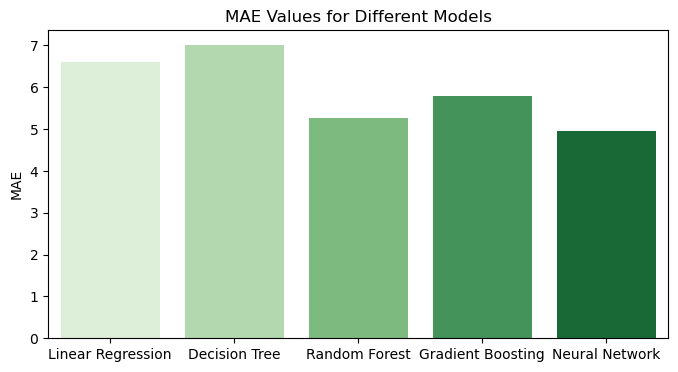

In [20]:
import seaborn as sns
positions = np.arange(len(model_names))
plt.figure(figsize=(8, 4))
sns.barplot(x=positions, y=mae_values, palette='Greens')
# plt.bar(positions, mae_values, align='center', alpha=0.7, palette='Greens')
plt.xticks(positions, model_names)
plt.ylabel('MAE')
plt.title('MAE Values for Different Models')


Text(0.5, 1.0, 'R2 Values for Different Models')

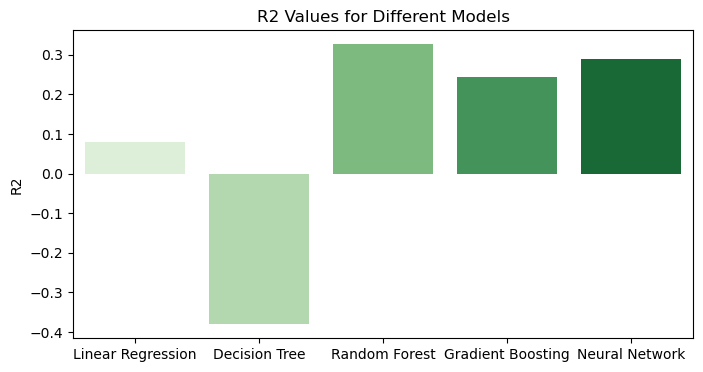

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(x=positions, y=r2_values, palette='Greens')
# plt.bar(positions, r2_values, align='center', alpha=0.7, palette='Greens')
plt.xticks(positions, model_names)
plt.ylabel('R2')
plt.title('R2 Values for Different Models')